In [1]:
import os
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import cv2
import torch
from torchvision.transforms import transforms
import torchvision
import pandas as pd
class DonedealImageDataset(Dataset):
    def __init__(self, root_dir, \
        transform=transforms.Compose([transforms.ToTensor()]), label_mapping={}):
        self.transform = transform
        self.label_mapping = label_mapping
        self.root_dir = root_dir
        self.idx2filepath = list()
        self.idx2label = list()
        
        # create an index for the folders
        for foldername in os.listdir(root_dir):
            folderpath = root_dir + foldername + "/"
            for filename in os.listdir(folderpath):
                filepath = folderpath + filename
                self.idx2filepath.append(filepath)
                self.idx2label.append(foldername)
    
    def __len__(self):
        return len(self.idx2filepath)

    def __getitem__(self, idx):
        imageHq = cv2.imread(self.idx2filepath[idx])/255.0

        image = cv2.resize(imageHq, (int(imageHq.shape[0] / 3), \
            int(imageHq.shape[1] / 3)), \
                interpolation = cv2.INTER_AREA)

        image = self.transform(image).float()

        label = self.label_mapping[self.idx2label[idx]]
        label = torch.tensor(label)
        return image, label

batch_size = 32

classes = ["cars", "motorbikes", "plantmachinery"]
class2num = {category: i for i, category in enumerate(classes)} 
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
     
trainset = DonedealImageDataset(root_dir='./train_types/', transform=transform, label_mapping=class2num)
testset = DonedealImageDataset(root_dir='./test_types/', transform=transform, label_mapping=class2num)

trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=True)

/home/admyyh/workspace_dv4/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class2num

{'cars': 0, 'motorbikes': 1, 'plantmachinery': 2}

In [3]:
classes

['cars', 'motorbikes', 'plantmachinery']

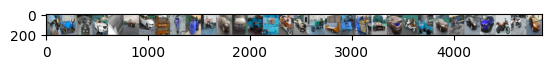

motorbikes plantmachinery motorbikes cars  plantmachinery cars  cars  plantmachinery plantmachinery plantmachinery motorbikes cars  cars  plantmachinery plantmachinery motorbikes cars  plantmachinery plantmachinery plantmachinery plantmachinery cars  cars  motorbikes plantmachinery cars  plantmachinery cars  cars  motorbikes motorbikes cars 


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images, nrow=32))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.LazyLinear(120),
            nn.LazyLinear(84),
            nn.LazyLinear(3),
        )

    def forward(self, x):
        return self.block(x)

net = Net().to("cuda:1")

/home/admyyh/workspace_dv4/venv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to("cuda:1"), data[1].to("cuda:1")

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print(f'[{epoch + 1}] loss: {running_loss / 2000:.8f}')
    running_loss = 0.0

print('Finished Training')

/home/admyyh/workspace_dv4/venv/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1] loss: 0.046
[2] loss: 0.042
[3] loss: 0.038
[4] loss: 0.035
[5] loss: 0.029
[6] loss: 0.025
[7] loss: 0.022
[8] loss: 0.021
[9] loss: 0.019
[10] loss: 0.016
[11] loss: 0.016
[12] loss: 0.013
[13] loss: 0.011
[14] loss: 0.009
[15] loss: 0.008
[16] loss: 0.006
[17] loss: 0.005
[18] loss: 0.004
[19] loss: 0.003
[20] loss: 0.002
[21] loss: 0.001
[22] loss: 0.001
[23] loss: 0.001
[24] loss: 0.000
[25] loss: 0.000
[26] loss: 0.000
[27] loss: 0.000
[28] loss: 0.000
[29] loss: 0.000
[30] loss: 0.000
[31] loss: 0.000
[32] loss: 0.000
[33] loss: 0.000
[34] loss: 0.000
[35] loss: 0.000
[36] loss: 0.000
[37] loss: 0.000
[38] loss: 0.000
[39] loss: 0.000
[40] loss: 0.000
[41] loss: 0.000
[42] loss: 0.000
[43] loss: 0.000
[44] loss: 0.000
[45] loss: 0.000
[46] loss: 0.000
[47] loss: 0.000
[48] loss: 0.000
[49] loss: 0.000
[50] loss: 0.000
[51] loss: 0.000
[52] loss: 0.000
[53] loss: 0.000
[54] loss: 0.000
[55] loss: 0.000
[56] loss: 0.000
[57] loss: 0.000
[58] loss: 0.000
[59] loss: 0.000
[60] l

In [17]:
classes = ["cars", "motorbikes", "plantmachinery"]

In [18]:
PATH = './donedeal_brand_classification.pth'
torch.save(net.state_dict(), PATH)

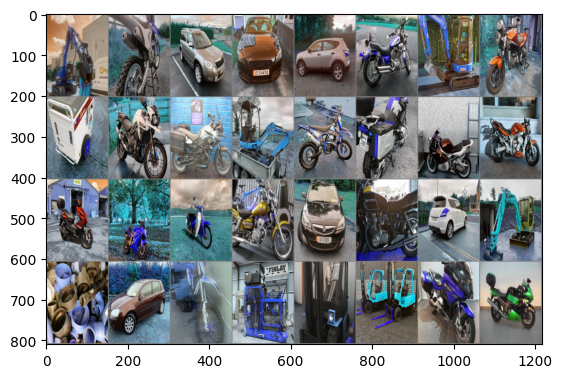

GroundTruth:  plantmachinery motorbikes cars  cars  cars  motorbikes plantmachinery motorbikes plantmachinery motorbikes motorbikes plantmachinery motorbikes motorbikes motorbikes motorbikes motorbikes motorbikes motorbikes motorbikes cars  motorbikes cars  plantmachinery plantmachinery cars  motorbikes plantmachinery plantmachinery plantmachinery motorbikes motorbikes


In [19]:
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
images = images.to("cuda")
labels = labels.to("cuda")
# print images


In [11]:
net = Net()
net.load_state_dict(torch.load(PATH))
net = net.to("cuda")

In [20]:
outputs = net(images)

In [21]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


Predicted:  plantmachinery motorbikes cars  cars  cars  motorbikes plantmachinery motorbikes cars  motorbikes motorbikes plantmachinery motorbikes cars  cars  motorbikes motorbikes plantmachinery plantmachinery motorbikes cars  cars  cars  plantmachinery plantmachinery cars  motorbikes plantmachinery motorbikes plantmachinery plantmachinery motorbikes
GroundTruth:  plantmachinery motorbikes cars  cars  cars  motorbikes plantmachinery motorbikes plantmachinery motorbikes motorbikes plantmachinery motorbikes motorbikes motorbikes motorbikes motorbikes motorbikes motorbikes motorbikes cars  motorbikes cars  plantmachinery plantmachinery cars  motorbikes plantmachinery plantmachinery plantmachinery motorbikes motorbikes


In [14]:
print("quads quads coaches plantmachinery plantmachinery plantmachinery plantmachinery cars  cars  motorbikes motorbikes coaches quads plantmachinery coaches plantmachinery cars  motorbikes commercials commercials motorbikes quads quads motorbikes plantmachinery commercials cars  plantmachinery motorbikes cars  cars  cars ")


quads quads coaches plantmachinery plantmachinery plantmachinery plantmachinery cars  cars  motorbikes motorbikes coaches quads plantmachinery coaches plantmachinery cars  motorbikes commercials commercials motorbikes quads quads motorbikes plantmachinery commercials cars  plantmachinery motorbikes cars  cars  cars 


In [22]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to("cuda")
        labels = labels.to("cuda")
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 77 %


In [23]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to("cuda")
        labels = labels.to("cuda")
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: cars  is 82.7 %
Accuracy for class: motorbikes is 74.8 %
Accuracy for class: plantmachinery is 75.8 %
